<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Process,-Training,-and-Modeling" data-toc-modified-id="Pre-Process,-Training,-and-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-Process, Training, and Modeling</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-of-well-log-analysis" data-toc-modified-id="Pre-processing-of-well-log-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pre-processing of well log analysis</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li><li><span><a href="#GradientBoost" data-toc-modified-id="GradientBoost-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>GradientBoost</a></span></li></ul></li></ul></li><li><span><a href="#Pycaret" data-toc-modified-id="Pycaret-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pycaret</a></span></li><li><span><a href="#Create-model" data-toc-modified-id="Create-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create model</a></span></li><li><span><a href="#Save/Load-Model" data-toc-modified-id="Save/Load-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save/Load Model</a></span></li></ul></div>

# Pre-Process, Training, and Modeling

## Pre-processing of well log analysis

Using the notebook with the well log, I interpreted the well logs in an excel sheet (using Ko Ko Rules in petrophysical interpretation), looking at Gamma ray, resistance, and Density and Neutron Porosities. 

In [29]:
!pip install numpy

In [30]:
!pip install pyexcel-xlsx

In [31]:
!pip install xlrd==1.2.0

In [32]:
!pip install XlsxWriter

In [33]:
!pip install xlwings

In [34]:
!pip install xlwt

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Read file
path0 = r'C:\Users\yuvem\OneDrive\Documents\table_well_log.xlsx'
table = pd.read_excel(path0)
table.head()

,well_id,gamma_ray,resistivity,bulk_density,neutron_porosity,neutron_porosity_density_crossover,hydrocarbon_present,max_depth
0,0,left,right,left,left,yes,yes,649.0
1,1,left,left,right,left,yes,yes,585.0
2,2,left,right,left,left,yes,yes,483.0
3,3,left,right,left,left,yes,yes,581.0
4,4,left,right,left,left,yes,yes,581.0


In [74]:
df = table.set_index('well_id')

In [75]:
df.isnull().sum()

gamma_ray                             20
resistivity                           17
bulk_density                          20
neutron_porosity                      20
neutron_porosity_density_crossover    20
hydrocarbon_present                   20
max_depth                             19
dtype: int64

In [76]:
# Clear nulls
df = df.dropna()
print(df.isnull().sum())
print(len(df))

gamma_ray                             0
resistivity                           0
bulk_density                          0
neutron_porosity                      0
neutron_porosity_density_crossover    0
hydrocarbon_present                   0
max_depth                             0
dtype: int64
87


In [77]:
df.resistivity.unique()

array(['right', 'left'], dtype=object)

In [78]:
len(df)

87

### Classification

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [80]:
!pip install xgboost

In [81]:
import xgboost
from xgboost import XGBClassifier

In [82]:
# OneHot Encoding
# Get x and y; create a categorical boolean mask, then get_dummies
X = df.drop(['max_depth'], axis=1)
y = df[['max_depth']]

cats = X.dtypes==np.object
# turn into list
cat_cols = X.columns[cats].tolist()
cat_cols

['gamma_ray ',
 'resistivity',
 'bulk_density',
 'neutron_porosity',
 'neutron_porosity_density_crossover',
 'hydrocarbon_present']

In [83]:
# Get dummies
dummies = pd.get_dummies(X, columns=cat_cols, prefix_sep='_', drop_first=True)
dummies.shape

(87, 7)

In [84]:
dummies.head(20)

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes
well_id,,,,,,,
0,1,0,1,0,0,1,1
1,1,0,0,1,0,1,1
2,1,0,1,0,0,1,1
3,1,0,1,0,0,1,1
4,1,0,1,0,0,1,1
5,1,0,1,0,0,1,1
7,1,0,1,1,1,0,0
8,1,0,1,1,0,0,0
9,1,0,1,0,0,1,1


In [85]:
X = dummies

In [86]:
y

,max_depth
well_id,
0,649.0
1,585.0
2,483.0
3,581.0
4,581.0
...,...
102,400.0
103,230.0
104,460.0


In [87]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(73, 7) (73, 1) (14, 7) (14, 1)


In [88]:
X_train

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes
well_id,,,,,,,
103,1,0,1,0,1,1,1
76,1,0,0,0,0,1,0
38,1,0,1,0,0,1,1
98,1,0,0,0,0,1,0
65,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...
23,1,0,1,0,0,1,1
72,1,0,0,0,0,0,0
89,1,0,1,0,1,1,0


In [89]:
# Create a list of models, with their performance scores

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [90]:
# Define lists
names = []
scores = []

# For loop; append to name 
# Define train test split scores
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred_models = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_models))
    names.append(name)
tr_test_split = pd.DataFrame({'Classifier': names, 'Score': scores})
print(tr_test_split)

  0%|          | 0/5 [00:00<?, ?it/s]D:\User\envs\pycaret\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\User\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\User\envs\pycaret\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
 60%|██████    | 3/5 [00:00<00:00, 15.87it/s]D:\User\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

[17:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

  Classifier     Score
0        KNN  0.000000
1        GNB  0.000000
2         RF  0.000000
3         GB  0.000000
4        XGB  0.071429


In [91]:
tr_test_split.head()

,Classifier,Score
0,KNN,0.000000
1,GNB,0.000000
2,RF,0.000000
3,GB,0.000000
4,XGB,0.071429


### Linear regression

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(X_test)

In [94]:
print("Depths where hydrocarbons are present =",y_pred)

Depths where hydrocarbons are present = [[457.66010475]
 [429.21660139]
 [429.21660139]
 [504.70527372]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [429.21660139]
 [429.21660139]
 [486.34691284]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [442.48135331]]


In [95]:
print('Const: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Const: 
 [402.6854918]
Coefficients: 
 [[ 59.21660139  -3.00731902 -56.78652718  38.4281663   47.04516897
   -4.24198843  28.34302382]]


In [96]:
# Get accuracy score
lr.score(X_train, y_train)*100

6.977866962634993

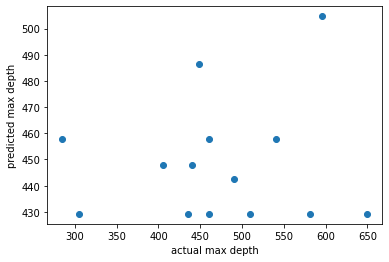

In [97]:
# Plot predictions against actual results
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel("actual max depth")
_ = plt.ylabel("predicted max depth")
plt.show()

### Random Forest 

In [98]:
rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)

In [99]:
# Train
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=1)

In [100]:
# Get predictions
y_pred2 = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)
rfc_probs = y_pred_prob[:,1]
print("Depths where hydrocarbons are present =",y_pred)

Depths where hydrocarbons are present = [[457.66010475]
 [429.21660139]
 [429.21660139]
 [504.70527372]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [429.21660139]
 [429.21660139]
 [486.34691284]
 [429.21660139]
 [457.66010475]
 [447.91874654]
 [442.48135331]]


In [101]:
# Accuracy score
rfc.score(X_train, y_train)*100

28.767123287671232

### Decision Tree Classifier

In [102]:
# Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred3 = dtc.predict(X_test)
print("Depths where hydrocarbons are present =",y_pred3)

Depths where hydrocarbons are present = [620. 410. 410. 450. 410. 620. 423. 410. 410. 243. 410. 620. 423. 262.]


In [104]:
#

In [105]:
dtc.score(X_train, y_train)*100

28.767123287671232

### Gaussian Naive Bayes

In [108]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

y_pred4 = gnb.predict(X_test)

In [109]:
gnb.score(X_train, y_train)*100

24.65753424657534

### GradientBoost

In [133]:
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train, y_train)

# y_predct as predictions for test data
y_pred5 = gbclf.predict(X_test)

In [134]:
gbclf.score(X_train, y_train)*100

28.767123287671232

Ranking of features:
1. feature 4 (0.26)
2. feature 5 (0.18)
3. feature 3 (0.18)
4. feature 6 (0.16)
5. feature 2 (0.16)
6. feature 1 (0.05)
7. feature 0 (0.01)


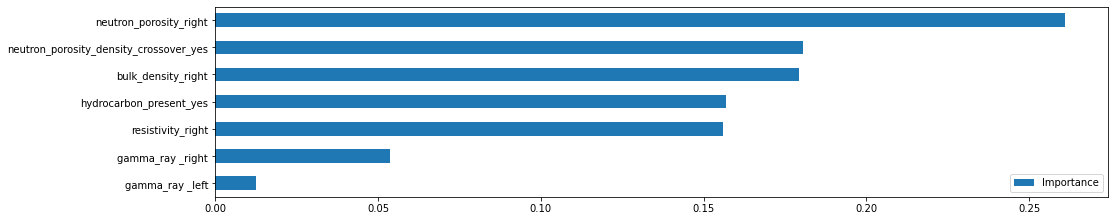

In [135]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbclf.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(X.shape[1])

# Print Ranking of features
print("Ranking of features:")
for v in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (v + 1, sorted_index[v], feature_importances[sorted_index[v]]))

# Define plot
df_feature_importance = pd.DataFrame(feature_importances, index=X.columns, columns=["Importance"])
df_feature_importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize = (16,len(feature_importances)/2));

In [137]:
#

# Pycaret

In [ ]:
!pip install pycaret

In [110]:
from pycaret.classification import *

In [111]:
s = setup(data = dummies, target = 'hydrocarbon_present_yes', normalize = True, train_size = 0.75)

,Description,Value
0,session_id,5337
1,Target,hydrocarbon_present_yes
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(87, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [112]:
# Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9690,0.9833,0.9667,0.9750,0.9657,0.9362,0.9437,0.0100
dt,Decision Tree Classifier,0.9690,0.9611,0.9333,1.0000,0.9600,0.9362,0.9437,0.0060
svm,SVM - Linear Kernel,0.9690,0.0000,0.9333,1.0000,0.9600,0.9362,0.9437,0.0290
rf,Random Forest Classifier,0.9690,0.9833,0.9333,1.0000,0.9600,0.9362,0.9437,0.1040
ada,Ada Boost Classifier,0.9690,0.9694,0.9333,1.0000,0.9600,0.9362,0.9437,0.0190
gbc,Gradient Boosting Classifier,0.9690,0.9806,0.9333,1.0000,0.9600,0.9362,0.9437,0.0140
et,Extra Trees Classifier,0.9690,0.9833,0.9333,1.0000,0.9600,0.9362,0.9437,0.0950
lr,Logistic Regression,0.9524,0.9958,0.9667,0.9417,0.9457,0.9029,0.9145,0.3960
knn,K Neighbors Classifier,0.9524,0.9833,0.9667,0.9417,0.9457,0.9029,0.9145,0.2750
ridge,Ridge Classifier,0.9524,0.0000,0.9667,0.9417,0.9457,0.9029,0.9145,0.0110


In [113]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
pred_nb = predict_model(best_model, data=dummies)
pred_nb

,gamma_ray _left,gamma_ray _right,resistivity_right,bulk_density_right,neutron_porosity_right,neutron_porosity_density_crossover_yes,hydrocarbon_present_yes,Label,Score
well_id,,,,,,,,,
0,1,0,1,0,0,1,1,1,0.9827
1,1,0,0,1,0,1,1,0,1.0000
2,1,0,1,0,0,1,1,1,0.9827
3,1,0,1,0,0,1,1,1,0.9827
4,1,0,1,0,0,1,1,1,0.9827
...,...,...,...,...,...,...,...,...,...
102,1,0,1,0,1,1,1,0,1.0000
103,1,0,1,0,1,1,1,0,1.0000
104,1,0,1,0,0,1,1,1,0.9827


# Create model

In [116]:
# Create the model for naive bayes
nb = create_model('nb')

# Finalize trained model
finalize_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8571,0.8333,0.6667,1.0000,0.8000,0.6957,0.7303
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


GaussianNB(priors=None, var_smoothing=1e-09)

In [122]:
# Create a model for random forest
rf = create_model('rf')

# Finalize trained model
finalize_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8571,0.8333,0.6667,1.0000,0.8000,0.6957,0.7303
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5337, verbose=0,
                       warm_start=False)

# Save/Load Model

In [117]:
from sklearn import set_config

In [125]:
save_model(nb, model_name='nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hydrocarbon_present_yes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='hydrocarbon_present_yes')),
                 ('fix_perfect', Remove_100(target='hydrocarbon_present_yes')),
                 ('clean_names', Cle

In [126]:
nb_load = load_model('nb')
print(nb_load)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='hydrocarbon_present_yes',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='hydrocarbon_present_yes')),
                ('fix_perfect', Remove_100(target='hydrocarbon_present_yes'))

In [127]:
set_config(display='diagram')
nb_load[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='hydrocarbon_present_yes', time_features=[])

In [128]:
set_config(display='text')

In [129]:
# Save rf model
save_model(rf, model_name='rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hydrocarbon_present_yes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         

In [130]:
# Load
rf_load = load_model('rf')
print(rf_load)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='hydrocarbon_present_yes',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
   

In [131]:
# configure
set_config(display='diagram')
rf_load[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='hydrocarbon_present_yes', time_features=[])

In [132]:
set_config(display='text')